
<h1>Problem

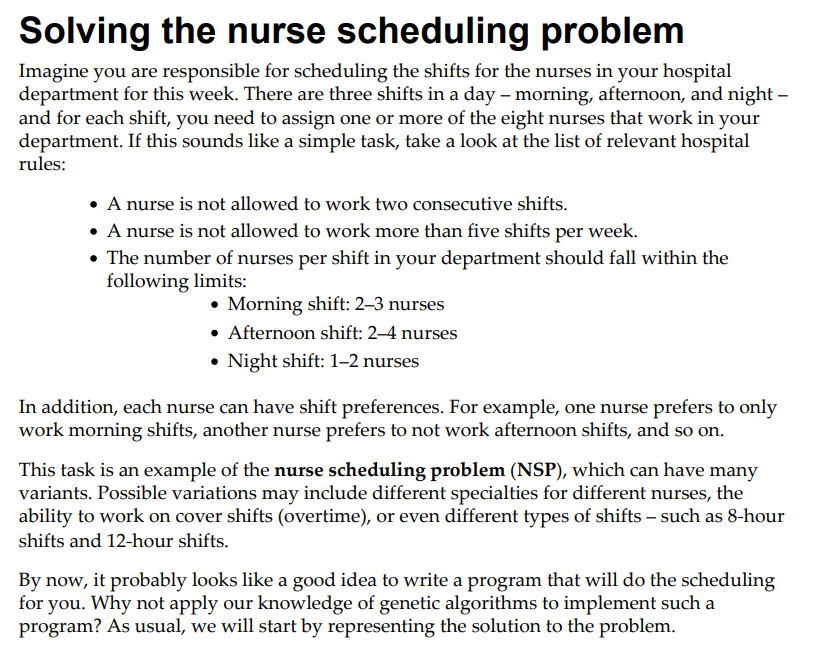

In [1]:
# CORE IDEAS
# For this problem we will use consider eigth nurses ( 8 nurses )
# nurses = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# For each nurse, that will work 7 days per week, we will consider three shifts a day
# day = [0 0 1] # Where 0 means "not working" and 1 means "working" # [morning afternoon night]
# week = [0 0 1] [1 0 1] [0 0 0] [0 1 0] [0 0 1] [0 0 1] [1 0 0]
# week = 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0

# Considering all nurses we have something like that 
# week_all_nurses =  0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0
#                    0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0
#                    0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0
#                    0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0



# CONDITIONS
# Nurses cant work two consecutive shifts ( hard constraints )
# Nurses are not allowed to work more than five shifts per week ( hard constraints )
# Nurses amount need be between {Morning: 2 - 3,        ( hard constraints )
#                                Afternoon: 2 - 4,
#                                Night: 1 - 2}
# Nurses have preferences ( soft constraints )

In [2]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1> Fitness function building

In [46]:
def fitness_function(solution, HARD=10, plot=False):
  global NURSES, NURSES_PREFERENCES, NURSES_LIMITS

  # Separating the nurses
  schedule = []
  for i in range(len(NURSES)):
    schedule.append(solution[21*i:21*(i+1):])
    
  # All violations
  consecutive_violation = 0
  limit_shift_violation = 0
  nurses_per_shift_violation = 0
  nurses_preferences_violation = 0
  nurses_shift = [0 for i in range(21)]

  for nurse, i in enumerate(schedule):
    if sum(i) > 5:
      limit_shift_violation += sum(i) - 5
    nurses_shift[20] += i[20]
    for j in range(int(len(i)/3)):
      day = i[3*j:3*(j+1):]
      for s, d in zip(NURSES_PREFERENCES[nurse],day):
        if s == 0:
          nurses_preferences_violation += d

    for j in range(len(i)-1):
      nurses_shift[j] += i[j]
      if i[j] == i[j+1] == 1:
        consecutive_violation += 1

  for i in range(int(len(nurses_shift)/3)):
    for n, j in enumerate(nurses_shift[3*i:3*(i+1):]):
      if j > NURSES_LIMITS[n][1]:
        nurses_per_shift_violation += j-NURSES_LIMITS[n][1]
      elif j >= NURSES_LIMITS[n][0]:
        pass
      else:
        nurses_per_shift_violation += NURSES_LIMITS[n][0]-j
  
  if plot == True:
    print("consecutive_violation ", consecutive_violation)
    print("limit_shift_violation ", limit_shift_violation)
    print("nurses_per_shift_violation ", nurses_per_shift_violation)
    print("nurses_preferences_violation ", nurses_preferences_violation)
    fitness = (consecutive_violation + limit_shift_violation + nurses_per_shift_violation)*HARD + nurses_preferences_violation
    print("fitness ", fitness)
    return consecutive_violation, limit_shift_violation, nurses_per_shift_violation, nurses_preferences_violation, fitness



  # Fitness score ( HARD*10 + SOFT )
  fitness = (consecutive_violation + limit_shift_violation + nurses_per_shift_violation)*HARD + nurses_preferences_violation

  return fitness,
  
  
  
  """# Consecutive shifts ( HARD )
  consecutive_violation = 0
  for i in schedule:
    for j in range(len(i)-1):
      if i[j] == i[j+1] == 1:
        consecutive_violation += 1
  
  # Limit 5 shifts for week ( HARD )
  limit_shift_violation = 0
  for i in schedule:
    limit_shift_violation += sum(i) - 5
  
  # Nurses per shift limit ( HARD )
  nurses_per_shift_violation = 0
  nurses_shift = [0 for i in range(21)]
  for i in schedule:
    nurses_shift[20] += i[20]
    for j in range(len(i)-1):
      nurses_shift[j] += i[j]
      
  for i in range(int(len(nurses_shift)/3)):
    for n, j in enumerate(nurses_shift[3*i:3*(i+1):]):
      if j > NURSES_LIMITS[n][1]:
        nurses_per_shift_violation += j-NURSES_LIMITS[n][1]
      elif j >= NURSES_LIMITS[n][0]:
        pass
      else:
        nurses_per_shift_violation += NURSES_LIMITS[n][0]-j

  # Nurses preferences ( SOFT )
  nurses_preferences_violation = 0
  for nurse, i in enumerate(schedule):
    for j in range(int(len(i)/3)):
      day = i[3*j:3*(j+1):]
      for s, d in zip(NURSES_PREFERENCES[nurse],day):
        if s == 0:
          nurses_preferences_violation += d"""

<h1>

<h1>Solving the problem

In [68]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
NURSES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
NURSES_PREFERENCES =  [[1, 0, 0], [1, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 1, 1], [0, 1, 1], [1, 1, 1]]
NURSES_LIMITS = [[2,3], [2,4], [1,2]]
DAYS = 7
SHIFTS_PER_DAY = 3
def gene_bin():
  return random.randint(0,1)
toolbox.register("Individual", tools.initRepeat, creator.ChromosomeStruct, gene_bin, n=DAYS*SHIFTS_PER_DAY*len(NURSES))
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individual)


# GENETIC OPERATORS
HARD_CONSTRAINSTS = 20
toolbox.register("evaluate", fitness_function, HARD=HARD_CONSTRAINSTS)
toolbox.register("select", tools.selTournament, tournsize=5)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1/DAYS*SHIFTS_PER_DAY*len(NURSES))

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(5)

# CONTROL PANEL
POPULATION_SIZE = 500
PROBABILITY_CROSSOVER = 0.9
PROBABILITY_MUTATION = 0.1
MAX_GENERATIONS = 100 # (stopping condition)
#random.seed(42)

# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = algorithms.eaSimple(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max 	min 	mean   
0  	500   	3269	1128	2281.97
1  	454   	3320	1044	1933.79
2  	463   	3502	886 	1737.07
3  	456   	3705	664 	1505.46
4  	453   	4111	601 	1332.5 
5  	441   	4467	503 	1264.64
6  	440   	4809	343 	1086.41
7  	470   	4706	259 	905.554
8  	453   	4971	238 	889.292
9  	447   	5089	177 	848.62 
10 	474   	5170	182 	731.434
11 	465   	5360	157 	708.922
12 	461   	5436	136 	899.84 
13 	458   	5493	117 	651.198
14 	446   	5332	76  	685.674
15 	446   	5575	76  	651.028
16 	452   	5256	75  	648.9  
17 	449   	5497	36  	496.106
18 	455   	5415	35  	624.26 
19 	462   	5256	35  	502.96 
20 	458   	5254	35  	475.832
21 	460   	5174	35  	552.464
22 	445   	5095	34  	552.636
23 	452   	5095	16  	461.608
24 	436   	5014	15  	496.33 
25 	455   	5016	15  	437.676
26 	460   	4936	15  	531.274
27 	452   	4936	15  	449.306
28 	455   	4936	15  	463.812
29 	454   	4936	14  	520.624
30 	454   	5015	14  	443.022
31 	455   	4936	14  	460.666
32 	471   	4936	14  	500.516
33 	459   	501

<h1>Plotting resuls

In [69]:
fitness_function(hof[0], plot=True)
print(hof[0])

consecutive_violation  0
limit_shift_violation  0
nurses_per_shift_violation  0
nurses_preferences_violation  14
fitness  14
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


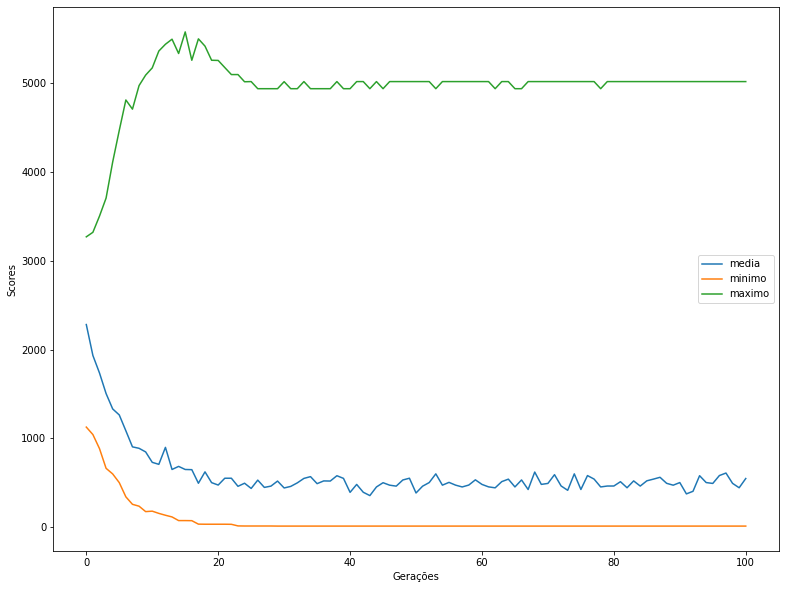

In [71]:
import matplotlib.pyplot as plt

# taking data
y_mean = logbook.select("mean")
y_min = logbook.select("min")
y_max = logbook.select("max")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

<h1>Trying to improve the result with elitism

In [72]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [83]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
NURSES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
NURSES_PREFERENCES =  [[1, 0, 0], [1, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 1, 1], [0, 1, 1], [1, 1, 1]]
NURSES_LIMITS = [[2,3], [2,4], [1,2]]
DAYS = 7
SHIFTS_PER_DAY = 3
def gene_bin():
  return random.randint(0,1)
toolbox.register("Individual", tools.initRepeat, creator.ChromosomeStruct, gene_bin, n=DAYS*SHIFTS_PER_DAY*len(NURSES))
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individual)


# GENETIC OPERATORS
HARD_CONSTRAINSTS = 10
toolbox.register("evaluate", fitness_function, HARD=HARD_CONSTRAINSTS)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1/DAYS*SHIFTS_PER_DAY*len(NURSES))

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(100)

# CONTROL PANEL
POPULATION_SIZE = 1000
PROBABILITY_CROSSOVER = 0.8
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 250 # (stopping condition)
#random.seed(42)

# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = eaSimpleWithElitism(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max 	min	mean   
0  	1000  	1784	659	1141.13
1  	759   	1622	586	1050.9 
2  	739   	1700	585	994.143
3  	761   	1836	546	948.48 
4  	739   	1865	474	916.777
5  	740   	1886	393	872.798
6  	775   	2058	372	877.924
7  	783   	2027	344	824.738
8  	797   	2159	332	795.559
9  	751   	2219	292	777.516
10 	743   	2230	292	759.13 
11 	785   	2340	254	753.89 
12 	735   	2351	184	730.167
13 	735   	2534	127	752.084
14 	753   	2502	127	695.827
15 	741   	2611	127	675.005
16 	762   	2633	127	652.834
17 	783   	2677	117	684.737
18 	743   	2706	105	630.653
19 	751   	2730	90 	608.975
20 	723   	2707	84 	627.526
21 	761   	2774	64 	620.793
22 	741   	2860	61 	594.938
23 	756   	2799	48 	631.788
24 	775   	2943	48 	655.133
25 	737   	2817	40 	606.773
26 	767   	2819	40 	597.078
27 	734   	2790	31 	558.686
28 	748   	2851	31 	570.13 
29 	763   	2830	31 	612.764
30 	766   	2850	31 	604.084
31 	774   	2809	31 	621    
32 	718   	2750	31 	510.284
33 	755   	2843	31 	601.062
34 	755   	2778	24 	

In [84]:
fitness_function(hof[0], plot=True)
print(hof[0])

consecutive_violation  0
limit_shift_violation  0
nurses_per_shift_violation  0
nurses_preferences_violation  6
fitness  6
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


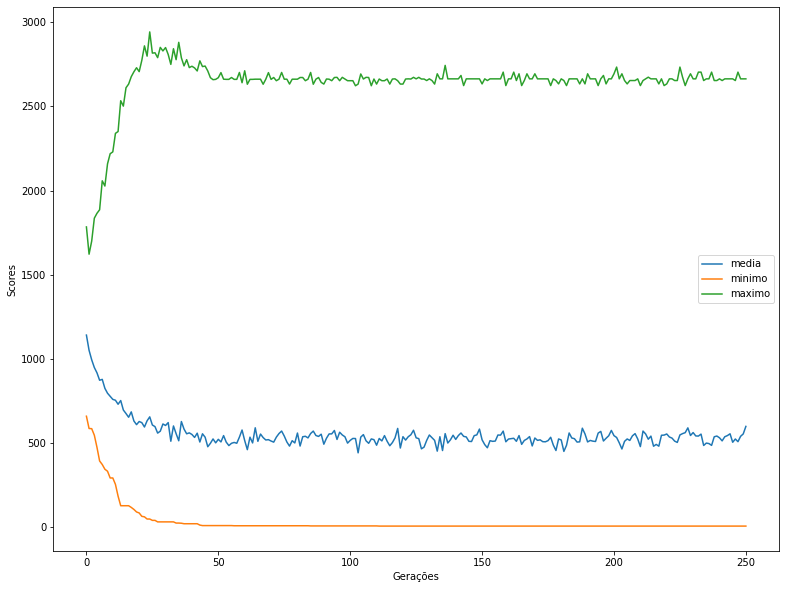

In [85]:
import matplotlib.pyplot as plt

# taking data
y_mean = logbook.select("mean")
y_min = logbook.select("min")
y_max = logbook.select("max")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()